In [0]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def read_dataset(filename=None):
  # read in the dataset
  frame = pd.read_csv(
      filepath_or_buffer=filename, 
      index_col=0)

  int_rate = frame.iloc[:,19:20]
  int_rate = int_rate['int_rate'].str.split('%').str.get(0)
  int_rate = pd.to_numeric(int_rate)
  
  frame = frame.drop(['int_rate'], axis=1)
  frame = frame.drop(['target'], axis=1)

  return frame,int_rate

In [0]:
def scale_my_dataset(data=None):
  scaler = preprocessing.StandardScaler()
  return scaler.fit_transform(data)

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, 
                       activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],
                       )),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [%]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
df,int_rate=read_dataset("example.csv")

In [11]:
le = preprocessing.LabelEncoder()
df['amount_diff_inv'] = le.fit_transform(df['amount_diff_inv'])
df['grade'] = le.fit_transform(df['grade'])
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['verification_status'] = le.fit_transform(df['verification_status'])
df['purpose'] = le.fit_transform(df['purpose'])
df['loan_status'] = le.fit_transform(df['loan_status'])
df['initial_list_status'] = le.fit_transform(df['initial_list_status'])
df['delinq_2yrs_cat'] = le.fit_transform(df['delinq_2yrs_cat'])
df['inq_last_6mths_cat'] = le.fit_transform(df['inq_last_6mths_cat'])
df['pub_rec_cat'] = le.fit_transform(df['pub_rec_cat'])
df

,loan_amnt,amount_diff_inv,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs_cat,inq_last_6mths_cat,open_acc,pub_rec,pub_rec_cat,acc_ratio,initial_list_status,loan_status
0,8400,1,36,270.06,1,2.0,1,66000.0,0,2,13.84,0,1,7,0,0,0.318182,1,2
4,20000,1,36,664.20,2,10.0,1,49000.0,1,2,15.58,1,0,8,0,0,0.285714,1,2
5,13625,1,60,326.36,2,1.0,1,50000.0,0,1,30.41,0,0,21,0,0,0.291667,1,2
7,15000,1,60,393.50,3,1.0,4,63890.0,0,2,20.36,0,1,7,0,0,0.875000,1,0
9,12000,1,60,277.18,2,10.0,1,68000.0,1,1,17.17,0,1,12,0,0,0.363636,1,4
11,5000,1,36,160.75,1,1.0,3,40000.0,1,2,10.38,0,1,25,1,1,0.555556,1,2
12,5000,1,36,176.51,3,10.0,1,105000.0,0,2,9.07,0,0,13,0,0,0.866667,1,0
13,4000,1,36,132.84,2,10.0,4,36000.0,2,2,16.40,0,0,5,0,0,0.714286,1,0
14,24000,1,36,771.60,1,5.0,1,50000.0,2,2,24.46,0,0,8,0,0,0.571429,1,0
18,18000,1,36,567.30,1,10.0,3,38200.0,0,1,24.07,1,0,19,0,0,0.463415,1,2


In [12]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(df)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
X_scaled = scale_my_dataset(df)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, int_rate, test_size=0.33, random_state=21)

In [15]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [16]:

EPOCHS = 500

# The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

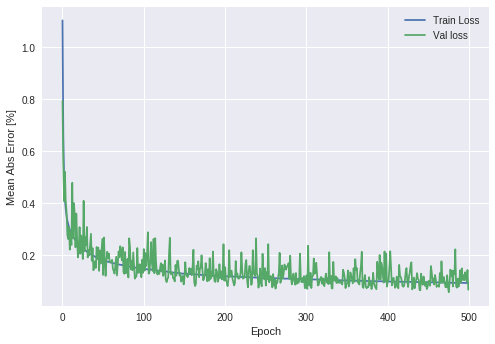

In [17]:
plot_history(history)

In [18]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}%".format(mae))

Testing set Mean Abs Error:    0.07%


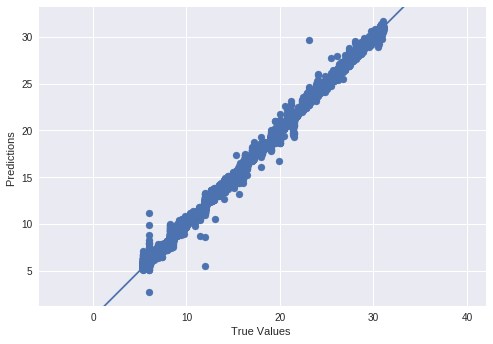

In [19]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

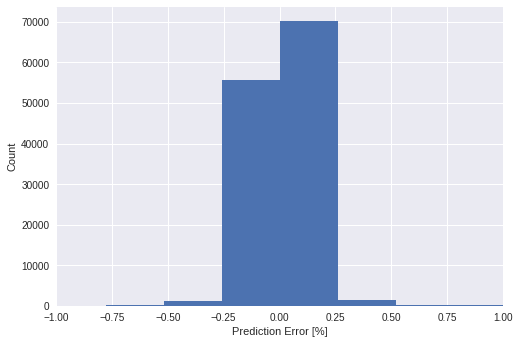

In [20]:
error = test_predictions - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [%]")
plt.ylabel("Count")
_ = plt.xlim([-1,1])